In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

In [30]:
product_categories = pd.read_excel('Data.xlsx', sheet_name='sr.1')
product_categories.head()

,id,product_category
0,1,Телефон
1,2,Монитор
2,3,Мышка
3,4,Клавиатура
4,5,Ноутбук


In [2]:
products = pd.read_excel('Data.xlsx', sheet_name='sr.2')
products.head()

,id,name,product_category_id,country_from
0,1,Realme 9 Pro 8/128 Gb,1,Китай
1,2,Redmi Note 10 Pro 8/128 Gb,1,Китай
2,3,Poco X3 Pro 8/256 Gb,1,Китай
3,4,Redmi Note 11 Pro 5G 8/128 GB,1,Китай
4,5,Honor 50 8/128 Gb,1,Китай


In [5]:
products[products.product_category_id == 1].count()

id                     32
name                   32
product_category_id    32
country_from           32
dtype: int64

In [34]:
suppliers = pd.read_excel('Data.xlsx', sheet_name='sr.4')
suppliers.head()

,id,supplier_name,address
0,1,Поставщик_1,Индия
1,2,Поставщик_2,США
2,3,Поставщик_3,Корея
3,4,Поставщик_4,Тайвань
4,5,Поставщик_5,Нидерланды


In [2]:
pd.read_excel('Data.xlsx', sheet_name='sr.3')

NameError: name 'pd' is not defined

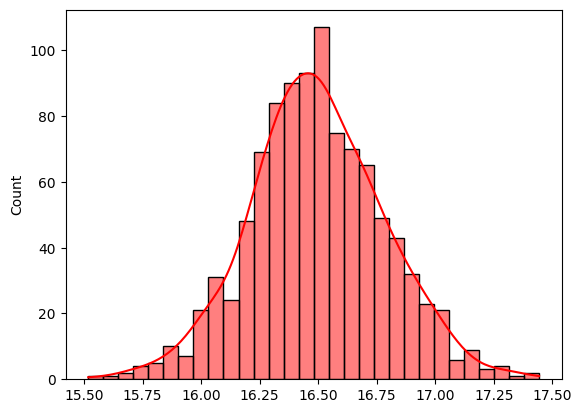

In [40]:
means = []
n_iter = 1000
size = 1000
data = products.id[products.product_category_id == 1].to_numpy()

for _ in range(n_iter):
    samples = np.random.choice(data, size=size, replace=True)
    mean = np.mean(samples)
    means.append(mean)

sns.histplot(means, bins=30, kde=True, color='red', alpha=0.5)
plt.show()

In [82]:
sell_score = []
for _ in range(1000):
    samples = np.random.choice(data, size=150, replace=True)
    sell_score.append(samples)

In [121]:
sells_generated_every_category = []
for i in product_categories.id:
    data = products.id[products.product_category_id == i].to_numpy()
    sell_score = []
    for _ in range(1000):
        samples = np.random.choice(data, size=150, replace=True)
        sell_score.append(samples)
    sell_score = np.concatenate(sell_score)
    sells_generated_every_category.append(sell_score)


In [122]:
sells_generated_every_category

[array([17,  4, 22, ..., 10, 29, 21]),
 array([37, 60, 34, ..., 56, 61, 58]),
 array([83, 76, 65, ..., 65, 85, 78]),
 array([103,  96,  99, ...,  95,  86,  89]),
 array([119, 126, 124, ..., 118, 108, 122]),
 array([132, 135, 132, ..., 133, 131, 131]),
 array([144, 149, 156, ..., 142, 157, 146])]

In [123]:
sells_generated = np.concatenate(sells_generated_every_category)

In [126]:
product_id_generated = pd.DataFrame(sells_generated, columns=['product_id'])

In [127]:
product_id_generated.shape[0]

1050000

In [308]:
quantity_generated = np.random.normal(loc=0.0, scale=2.0, size=1050000*3)

<AxesSubplot: ylabel='Count'>

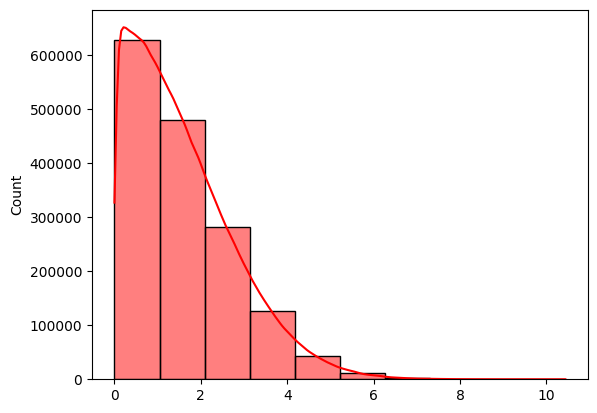

In [309]:
sns.histplot(quantity_generated[quantity_generated>0], bins=10, kde=True, color='red', alpha=0.5)

In [320]:
quantity_generated[quantity_generated>0].shape[0]

1050000

In [321]:
from math import ceil

tsd = pd.DataFrame(quantity_generated[quantity_generated>0], columns=['ts']).loc[1:1050000]

for i in range(ceil(max(tsd.ts))):
    print(f'{i, i+1}: {tsd[(tsd.ts>i) & (tsd.ts<i+1)].shape[0]}')

# tsd[(tsd.ts>0) & (tsd.ts<1)].shape[0]
# tsd[(tsd.ts>1) & (tsd.ts<2)].shape[0]

(0, 1): 0
(1, 2): 0
(2, 3): 0
(3, 4): 0
(4, 5): 0
(5, 6): 0
(6, 7): 0
(7, 8): 0
(8, 9): 0
(9, 10): 0
(10, 11): 0


In [322]:
tsd.shape[0]

1050000

In [323]:
tdd = tsd.copy()
# tdd.loc[(tdd.ts>0) & (tdd.ts<1), 'ts'] = 1


In [324]:
tdd[tdd.ts==1].shape[0]

402941

In [325]:
for i in range(ceil(max(tsd.ts))):
    tdd.loc[(tdd.ts>i) & (tdd.ts<i+1), 'ts'] = i+1

In [326]:
for i in range(ceil(max(tsd.ts))):
    print(tdd[tdd.ts == i+1].shape[0])

402941
314674
192069
92753
34564
10156
2347
433
54
8
1


In [329]:
tdd

,ts
1,5.0
2,3.0
3,2.0
4,4.0
5,1.0
...,...
1049996,1.0
1049997,1.0
1049998,2.0
1049999,1.0


In [330]:
quantity_generated = tdd.copy()

,ts
0,5.0
1,3.0
2,2.0
3,4.0
4,1.0
...,...
1049995,1.0
1049996,1.0
1049997,2.0
1049998,1.0


In [353]:
ntd = pd.concat([pd.DataFrame(sells_generated), quantity_generated.reset_index().drop('index', axis=1)], axis=1)
ntd = ntd.to_numpy()

In [356]:
ntd = pd.DataFrame(ntd, columns=['product_id', 'quantity'])
ntd

,product_id,quantity
0,17.0,5.0
1,4.0,3.0
2,22.0,2.0
3,30.0,4.0
4,4.0,1.0
...,...,...
1049995,156.0,1.0
1049996,146.0,1.0
1049997,142.0,2.0
1049998,157.0,1.0


(array([   5.,   18.,   39.,   77.,  183.,  307.,  556.,  799., 1017.,
        1248., 1360., 1268., 1076.,  804.,  556.,  354.,  198.,   84.,
          34.,   11.,    6.]),
 array([-10.        ,  -9.04761905,  -8.0952381 ,  -7.14285714,
         -6.19047619,  -5.23809524,  -4.28571429,  -3.33333333,
         -2.38095238,  -1.42857143,  -0.47619048,   0.47619048,
          1.42857143,   2.38095238,   3.33333333,   4.28571429,
          5.23809524,   6.19047619,   7.14285714,   8.0952381 ,
          9.04761905,  10.        ]),
 <BarContainer object of 21 artists>)

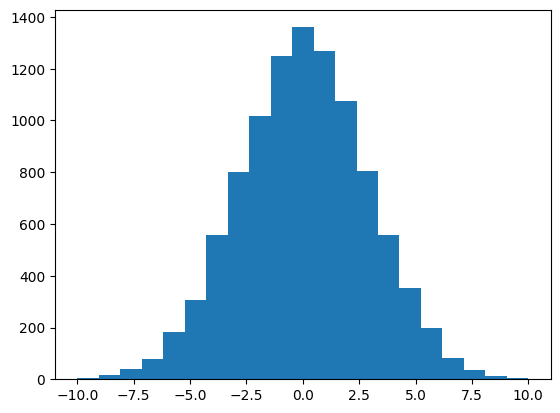

In [358]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 11)
xU, xL = x + 0.5, x - 0.5 
prob = ss.norm.cdf(xU, scale = 3) - ss.norm.cdf(xL, scale = 3)
prob = prob / prob.sum() # normalize the probabilities so their sum is 1
nums = np.random.choice(x, size = 10000, p = prob)
plt.hist(nums, bins = len(x))

In [7]:
df = pd.DataFrame({'Price':[30000, 35000, 25000], 'Time':[0, 90, 1094]})
# df = pd.DataFrame({'Price':[30000, 35000], 'Time':[0, 90]})

In [8]:
df['t**2'] = df['Time']**2
df['t**3'] = df['Time']**3
df['t**4'] = df['Time']**4

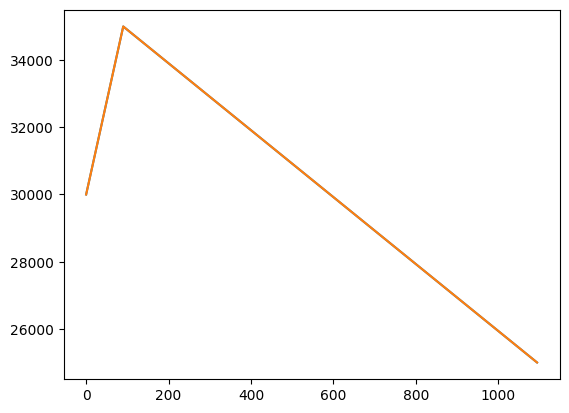

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X, y = df[['Time', 't**2', 't**3', 't**4']], df['Price']
model.fit(X, y)

plt.plot(X['Time'], y)
plt.plot(X['Time'], model.predict(X))
plt.show()


/Users/anvarshagvaleev/Education/DataScience/University/BusinessAnalysis/exercise_1/venv/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- t
Feature names seen at fit time, yet now missing:
- Time

  warnings.warn(message, FutureWarning)


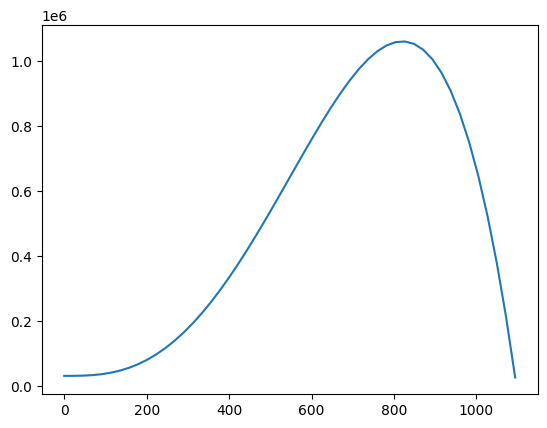

In [19]:
X_ = pd.DataFrame({'t': np.linspace(0, 1094)})
X_['t**2'] = X_['t']**2
X_['t**3'] = X_['t']**3
X_['t**4'] = X_['t']**4

plt.plot(X_['t'], model.predict(X_))
plt.show()

In [26]:
start_price, start_time = 30000, 0
max_price, max_time = 35000, 90
end_price, end_time = 25000, 1095

df = pd.DataFrame({'Price': [start_price, max_price, end_price], 'Time': [start_time, max_time, end_time]})

In [8]:
df['Time**2'] = df['Time']**2
df['Time**3'] = df['Time']**3

In [11]:
model = LinearRegression()

X, y = df.drop(['Price'], axis=1), df['Price']

In [14]:
model.fit(X, y)

LinearRegression()

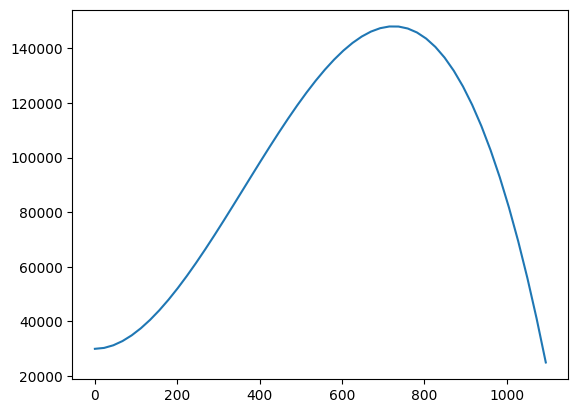

In [25]:
X_ = pd.DataFrame({'Time': np.linspace(0, 1095)})
X_['Time**2'] = X_['Time']**2
X_['Time**3'] = X_['Time']**3

y = model.predict(X_)

x = np.linspace(0, 1095)

plt.plot(x, y)
plt.show()

In [106]:
start_price, start_time = 30000, 0
max_price, max_time = 35000, 90

df1 = pd.DataFrame({'Price': [start_price, max_price], 'Time': [start_time, max_time]})

In [107]:
df1['Time**2'] = df1['Time'] ** 2

In [108]:
model = LinearRegression()

X, y = df1.drop(['Price'], axis=1), df1['Price']

model.fit(X, y)

LinearRegression()

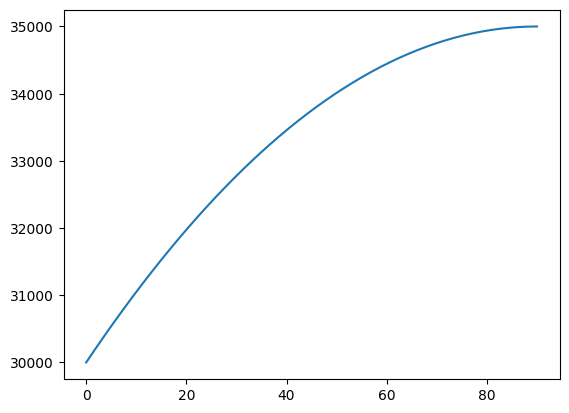

In [123]:
x = np.linspace(0, 90)
X_ = pd.DataFrame({'Time': x})
X_['Time**2'] = X_['Time']**2

# y = model.predict(X_)
b, a = model.coef_
c = model.intercept_

y = - a * (x - 90) ** 2 + b * (x - 90) + (c + 5000)

plt.plot(x, y)
plt.show()

In [130]:
start_price, start_time = 35000, 90
end_price, end_time = 25000, 1095

df1 = pd.DataFrame({'Price': [start_price, end_price], 'Time': [start_time, end_time]})
df1['Time**2'] = df1['Time'] ** 2

In [131]:
model = LinearRegression()

X, y = df1.drop(['Price'], axis=1), df1['Price']

model.fit(X, y)

LinearRegression()

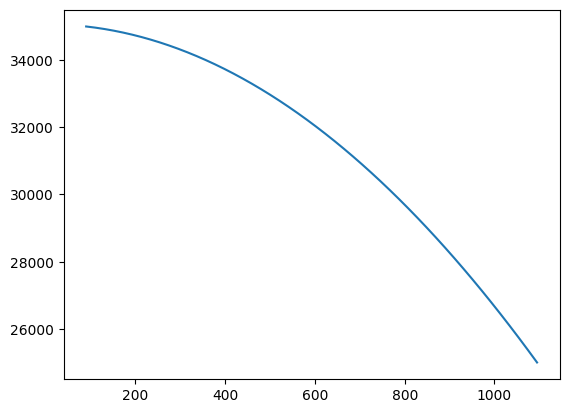

In [134]:
x = np.linspace(90, 1095)
X_ = pd.DataFrame({'Time': x})
X_['Time**2'] = X_['Time']**2

y = model.predict(X_)
b, a = model.coef_
c = model.intercept_

# y = - a * (x - 90) ** 2 + b * (x - 90) + (c + 5000)

plt.plot(x, y)
plt.show()

In [180]:
start_price, start_time = 30000, 0
max_price, max_time = 35000, 365
end_price, end_time = 25000, 1095

df = pd.DataFrame({'Price': [start_price, max_price, end_price], 'Time': [start_time, max_time, end_time]})
df['Time**2'] = df['Time'] ** 2

In [181]:
df1 = df[:2]
df2 = df[1:]

In [182]:
df2

,Price,Time,Time**2
1,35000,365,133225
2,25000,1095,1199025


In [183]:
model1 = LinearRegression()
model2 = LinearRegression()

X1, y1 = df1.drop(['Price'], axis=1), df1['Price']
X2, y2 = df2.drop(['Price'], axis=1), df2['Price']

model1.fit(X1, y1)
model2.fit(X2, y2)

LinearRegression()

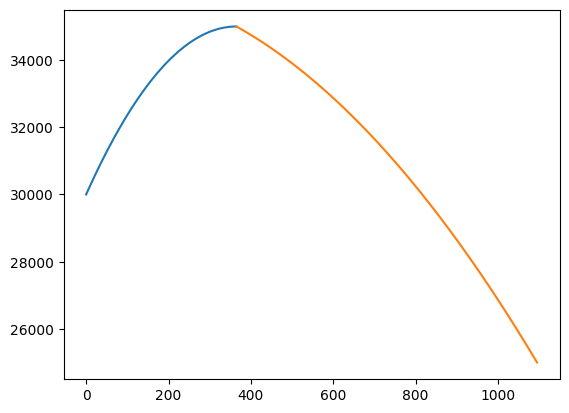

In [191]:
x1 = np.linspace(start_time, max_time)
b1, a1 = model1.coef_
c1 = model1.intercept_
y1 = - a1 * (x1 - max_time) ** 2 + b1 * (x1 - max_time) + (c1 + max_price - start_price)

x2 = np.linspace(max_time, end_time)
X2_ = pd.DataFrame({'Time': x2})
X2_['Time**2'] = X2_['Time'] ** 2
y2 = model2.predict(X2_)


plt.plot(x1, y1)
plt.plot(x2, y2)
plt.show()

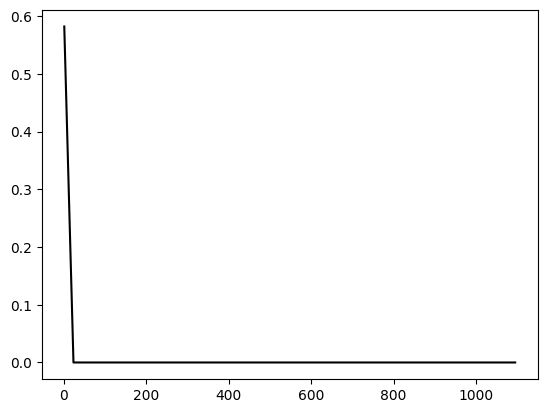

In [222]:
def plnk(x, a=1, b=1):
    return a / ((np.exp(b / x) - 1) * (x ** 5))

x = np.linspace(1, 1095)
y = plnk(x)

plt.plot(x, y, '-k')
plt.show()